In [2]:
# Install kagglehub if not already installed
%pip install kagglehub

import kagglehub

# Download latest version
path = kagglehub.dataset_download("wyattowalsh/basketball")

print("Path to dataset files:", path)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: C:\Users\fanh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\fanh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\fanh\.cache\kagglehub\datasets\wyattowalsh\basketball\versions\231


In [11]:
import os
import pandas as pd

# 获取 CSV 文件夹路径
csv_folder = os.path.join(path, "csv")

# 列出文件夹中的所有 CSV 文件
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

# 读取所有 CSV 文件并存储为字典
csv_data = {file: pd.read_csv(os.path.join(csv_folder, file)) for file in csv_files}

# 打印读取的文件名
print("CSV files loaded:", csv_files)

CSV files loaded: ['common_player_info.csv', 'draft_combine_stats.csv', 'draft_history.csv', 'game.csv', 'game_info.csv', 'game_summary.csv', 'inactive_players.csv', 'line_score.csv', 'officials.csv', 'other_stats.csv', 'player.csv', 'play_by_play.csv', 'team.csv', 'team_details.csv', 'team_history.csv', 'team_info_common.csv']


In [13]:
game_data = csv_data['game.csv']
game_data.head()


,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season


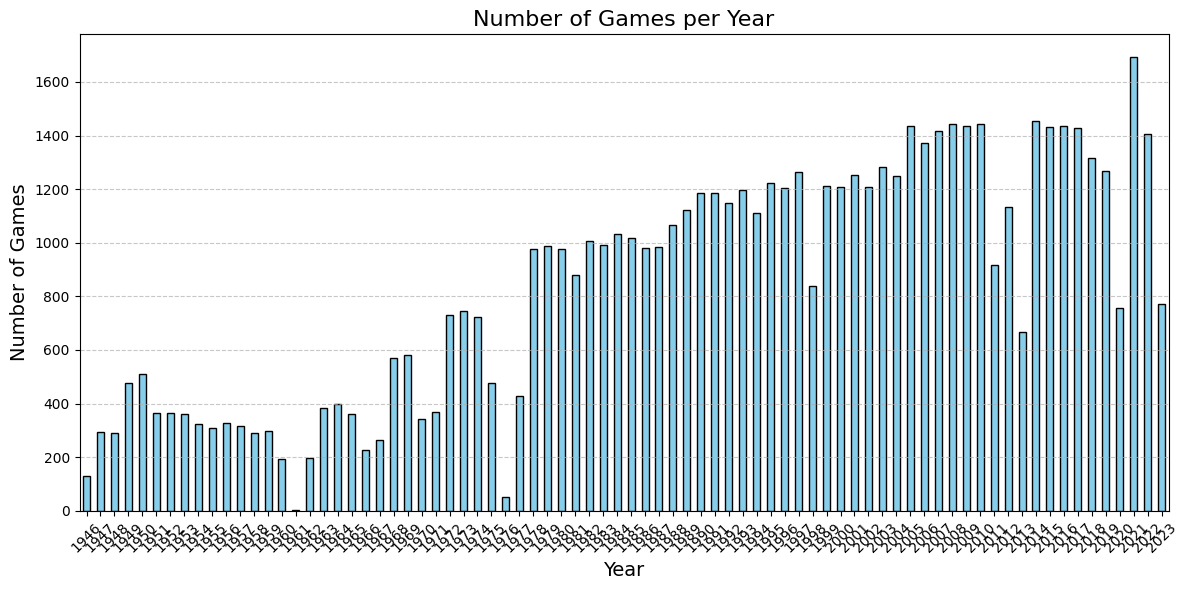

In [14]:
import matplotlib.pyplot as plt

# 提取年份信息
game_data['year'] = pd.to_datetime(game_data['game_date']).dt.year

# 按年份统计比赛数量
games_per_year = game_data.groupby('year').size()

# 绘制图表
plt.figure(figsize=(12, 6))
games_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Games per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()